# 1. Short Questions

### 1. Suppose we have a panel data of of 100 firms over 20 years at a monthly frequency. We are interested in how firms’ bond ratings affect their investment. Give an example of an omitted variable that can be fixed by Fixed Effects or First Differences. Give another example of an omitted variable that cannot be fixed by Fixed Effects or First Differences.

Answer:

We can use Fixed Effect and First Difference only to fix the model when the variable $S_it$ is correlated to $a_i$ (which is the unobserved variable that is constant across time but different for different firms, thus firm specific. Buf FE and FD cannot be used to fix the correlation between $S_it$ and $v_it$ (which is the unobserved variables that vary across both time and firm).

Example of $a_i$ unobserved variable that is time-invariant: something that affects bond ratings but is also correlated to investment, that doesn't vary across time. Example could be managerial competency if we assume same managers.

such as inflation? risk profile? leverage ratio? Managerial competency?

Example of omitted variable that cannot be fiexd by FF and FD is an error: managerial competency



### 2. Suppose you are interested in the effect of being included in the S&P 500 index on stock prices. Give at least two reasons why OLS might not be the best linear unbiased estimator.

Answer:

Correlation between one variable and another? correlation between shocks?
$a_i$ is the same across time and thus correlated with $y_i1$, $y_i2$, $y_i3$, etc.

Serial correlation?

### 3. 3. Is the following statement true or false? “If fixed effects model and random effects model give very different estimates, then the estimate from the random effects model is consistent.” Please explain the reasoning for your answer.


Answer:



# 2. Housing Prices

## Loading data

In this exercise you will work with a dataset containing housing prices from a large sample of neighborhoods.

In [ ]:
!pip install linearmodels
from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS as fe # for fixed effects

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 KB 8.3 MB/s eta 0:00:00


In [ ]:
pip install openpyxl==3.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 5.9 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [ ]:
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 3.8 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

First we load data on housing prices and neighborhood characteristics.

In [ ]:
data = pd.read_excel('https://drive.google.com/uc?export=download&id=158op24J4XwD6erUNU1KlbnPkR6Rc9_Rl')

In [ ]:
data.head()

,price,crime,nox,rooms,dist,radial,proptax
0,2400000,0.006,5.38,6.57,4.09,1,29.6
1,2159900,0.027,4.69,6.42,4.97,2,24.2
2,3470000,0.027,4.69,7.18,4.97,2,24.2
3,3340000,0.032,4.58,7.00,6.06,3,22.2
4,3619900,0.069,4.58,7.15,6.06,3,22.2


## Variable List

- price: Median housing price

- crime: Crimes per capita

- nox: Nitrous oxide in parts per 100 million

- rooms: Average number of rooms

- dist: Weighted distance to employment centers

- radial: Accessibility index to radial highways

- proptax: Property tax per $1,000


**1. Run a regression with the following model, and report the $R^{2}$ of the regression.**

$$price_{i}=\beta_{0}+\beta_{1}crime_{i}+\beta_{2}nox_{i}+\beta_{3}dist_{i}+\beta_{4}radial_{i}+\beta_{5}proptax_{i}+\epsilon_{i}$$

In [ ]:
import statsmodels.formula.api as smf

formula = 'price ~ crime + nox + dist + radial + proptax'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     43.80
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.84e-37
Time:                        15:18:41   Log-Likelihood:                -7574.5
No. Observations:                 506   AIC:                         1.516e+04
Df Residuals:                     500   BIC:                         1.519e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     5.2e+06   3.52e+05     14.784      0.0

**What is the $R^2$?**

Answer:

The $R^2$ is 30.5% and the adjusted $R^2$ is 29.8%.

**2. Run a Breusch-Pagan test for heteroskedasticity**

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms


# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

# Get the test result
test_result = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test_result)


[('Lagrange multiplier statistic', 14.676771897913772),
 ('p-value', 0.011836520449436286),
 ('f-value', 2.987192759969464),
 ('f p-value', 0.011432859124893014)]



**Is there heteroskedasticity present?**

**Answer:**

The null hypothesis ($H_0$): Signifies that Homoscedasticity is present.

The alternative hypothesis: ($H_1$): Signifies that the Homoscedasticity is not present (i.e. heteroscedasticity exists)

Here, the Lagrange multiplier statistic for the test comes out to be equal to 14.676 and the corresponding p-value comes out to be equal to 0.011. Since the p-value is less than 0.05 so we reject the null hypothesis. Hence, we say that heteroscedasticity is present in the regression model.

**If there is heteroskedasticity, fix this problem by running a second regression using White standard errors.**

In [ ]:
result = smf.ols(formula ='price ~ crime + nox + dist + radial + proptax', data =data).fit(cov_type='HC1')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     57.86
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.82e-47
Time:                        15:18:46   Log-Likelihood:                -7574.5
No. Observations:                 506   AIC:                         1.516e+04
Df Residuals:                     500   BIC:                         1.519e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     5.2e+06   3.05e+05     17.059      0.0

Explain what has (and hasn’t) changed.

**Answer:**

The coeffeceints and $R^2$ are the same, but the standard error have now become heteroskedasticity-consistent (HC) standard errors or heteroskedasticity-robust standard errors.

In regression and time-series modelling, basic forms of models make use of the assumption that the errors or disturbances $u_i$ have the same variance across all observation points. When this is not the case, the errors are said to be heteroskedastic, and this behaviour will be reflected in the residuals
$\hat{u_i}$ estimated from a fitted model. Heteroskedasticity-consistent standard errors are used to allow the fitting of a model that does contain heteroskedastic residuals.

**3. Run an F-test in Stata to check if *proptax* and *radial* jointly have no effect.**

In [ ]:
f_test = (result.f_test('proptax = radial'))
print(f_test)

<F test: F=array([[27.91833511]]), p=1.8926872778437643e-07, df_denom=500, df_num=1>


**What do you conclude?**

**Answer:**

$H_0$: proptax = radial = 0 (jointly have no effect)

$H_1$: proptax = radial =/= 0 (jointly have an effect)

As the p-value of f-stat is less than 5%, we reject the null hypothesis, the two variable do jointly have an effect and are jointly significant.


**4. Run a Ramsey RESET test for functional form specification.**

In [ ]:
from statsmodels.stats.outliers_influence import reset_ramsey

result = smf.ols(formula ='price ~ crime + nox + dist + radial + proptax', data =data).fit()
reset_ramsey(result, degree=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[5.79247081]]), p=0.0032596910225996204, df_denom=498, df_num=2>

**Is the linear model misspecified?**

**Answer:**

A common source of model specification error in OLS regressions is the omission of relevant variables. When variables are omitted, variations in the dependent variable may be falsely attributed to the included variables. This can result in inflated errors for regressors and can distort the estimated coefficients. The ramsey RESET test tests for these omissions. The predicted
$y$ value is normalized between 0 and 1 before the powers are calculated. If the regression is properly specified, the coefficients on all powers of the predicted $y$ should be jointly insignificant.

We test the hypothesis that the coefficients on all powers of $\hat{y}$ are jointly insignificant. If the regression is properly specified, the coefficients on all powers of the predicted should be jointly insignificant.

$H_0$: coefficients are jointly insignificant (model correctly specified).

$H_1$: coefficients are jointly significant (model incorrectly specified).

Since the p-value of our f-stat is 0.003 and thus less than 0.05, we reject the null-hypothesis and the model is incorrectly specified. Thus, our model does suffer from omitted variables.



**5. Run a regression using a log variant of the original model, as shown below. [Hint: You will need to create a new variable that is the natural log of price.] Be sure to use White standard errors if you found there was heteroskedasticity.**

$$\log(price_{i})=\beta_{0}+\beta_{1}crime_{i}+\beta_{2}nox_{i}+\beta_{3}dist_{i}+\beta_{4}radial_{i}+\beta_{5}proptax_{i}+\epsilon_{i}$$

In [ ]:
from scipy.stats.morestats import log
from numpy import log as ln

In [ ]:
data['price_log'] = ln(data['price'])

In [ ]:
result = smf.ols(formula ='price_log ~ crime + nox + dist + radial + proptax', data =data).fit(cov_type='HC1')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     68.20
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.72e-54
Time:                        16:04:13   Log-Likelihood:                -120.39
No. Observations:                 506   AIC:                             252.8
Df Residuals:                     500   BIC:                             278.1
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8072      0.119    133.079      0.0

**Compare the goodness-of-fit statistics for this model and the original model. Which one is a better fit?**

Answer:

This model is better than original, as it has a higher $R^2$ and adjusted-$R^2$.

# 3. Value of Patents

In this exercise we study the value of patents for firms. Suppose we have a panel dataset for a sample of publicly listed firms. For each firm we have the number of patents granted to that firm in each year and the stock price and market value by the end of each year.

In [ ]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS as fe

## Loading data

In this exercise you will work with a dataset that matches the Compustat data to patents.

In [ ]:
data = pd.read_excel('https://drive.google.com/uc?export=download&id=1u7lLzj-OND0rRMCOkKc8g_RH-0GkoR1y')
## could take some time to load

In [ ]:
data.head()

,permno,year,npats,xrd,csho,prcc_c,conm
0,10001,1986,0,NaN,0.985,7.000,GAS NATURAL INC
1,10001,1987,0,NaN,0.991,5.875,GAS NATURAL INC
2,10001,1988,0,NaN,0.992,6.375,GAS NATURAL INC
3,10001,1989,0,NaN,1.001,10.125,GAS NATURAL INC
4,10001,1990,0,NaN,1.031,9.500,GAS NATURAL INC


## Variable List

- permno: Company ID

- year: Year of observation

- npats: Number of patents the firm is granted in each year

- xrd: R&D investment (millions)

- csho: Number of common shares outstanding (millions)

- prcc_c: Year-end stock price

- conm: Company name


**1. Consider an OLS model. What assumption do you need for the OLS estimator to be unbiased? Do you think the assumption is satisfied here and why?**

**Answer**:

An estimator of a given parameter is said to be unbiased if its expected value is equal to the true value of the parameter. In other words, an estimator is unbiased if it produces parameter estimates that are on average correct. Meaning the difference between this estimator's expected value and the true value of the parameter being estimated is zero.

In order for the estimator to be unbiased, it must satisfy the assumption of zero-mean shocks $E[e_i|x_i] = 0$.

we want the beta to be bias and error uncorrelated to "Y" which is market value. epsilon is everything that affects market value aside from patents.
It is possible there is something that affects "Y" and is correlated to patents. Hence, these omitted variables can create bias.

???Its likely the relationship is not linear, and thus the unbiaseness assumption is violated.????

**2. If the assumption from 1 is satisfied, is the OLS estimator BLUE? What procedure can you do to get an estimator that is BLUE?**

**Answer**:

The OLS estimator is not BLUE as it violates the zero-mean error condition.

transform to Nonlinear

Omitted variables

**3. If the assumption from 1 is not satisfied, what are the two ways to get unbiased and consistent estimates? Use one or two sentences to describe each approach.**


**Answer**:

first difference

fixed effect

nonparametric regression??

**4. How many firms have at least one patent? How many firms have no patent?**

In [ ]:
df_1 = data.groupby('conm')['npats'].sum()

In [ ]:
(df_1>0).sum()

5404

In [ ]:
(df_1==0).sum()

14532

In [ ]:
df_1 = data.loc[(data['npats']>=1)]
print(df_1.describe())

             permno          year         npats           xrd          csho  \
count  35752.000000  35752.000000  35752.000000  29871.000000  35641.000000   
mean   56911.820346   1996.217890     14.930018     99.468638    109.198209   
std    27094.149207      8.507077     36.502833    450.805249    381.425850   
min    10006.000000   1980.000000      1.000000     -0.100000      0.000000   
25%    30940.000000   1989.000000      1.000000      3.959500      9.205000   
50%    62842.000000   1997.000000      3.000000     14.900000     24.428000   
75%    81066.000000   2003.000000     10.000000     51.549000     67.024000   
max    93287.000000   2010.000000    467.000000  12183.000000  10085.155000   

             prcc_c  
count  35735.000000  
mean      26.702288  
std      300.727030  
min        0.002700  
25%        6.500000  
50%       16.210000  
75%       31.750000  
max    34100.000000  


In [ ]:
df_1.head()

,permno,year,npats,xrd,csho,prcc_c,conm
66,10006,1980,50,6.565,9.009,46.000,ACF INDUSTRIES HOLDING CORP
67,10006,1981,57,8.234,9.156,40.875,ACF INDUSTRIES HOLDING CORP
68,10006,1982,28,7.661,8.217,32.750,ACF INDUSTRIES HOLDING CORP
69,10006,1983,28,6.792,8.385,50.000,ACF INDUSTRIES HOLDING CORP
70,10006,1984,15,1.067,0.000,53.875,ACF INDUSTRIES HOLDING CORP


In [ ]:
df_2 = data.loc[(data['npats'] == 0)]
print(df_2.describe())

              permno           year     npats           xrd           csho  \
count  180176.000000  180176.000000  180176.0  65452.000000  176648.000000   
mean    63573.080926    1995.522761       0.0     11.766421      42.020527   
std     26178.431555       8.255943       0.0    110.058310     315.619519   
min     10001.000000    1980.000000       0.0     -0.397000       0.000000   
25%     46068.000000    1989.000000       0.0      0.000000       3.900000   
50%     76220.000000    1996.000000       0.0      0.627000       9.511000   
75%     83618.000000    2002.000000       0.0      4.234000      26.358000   
max     93399.000000    2010.000000       0.0  10092.579000   91125.785000   

              prcc_c  
count  168391.000000  
mean       22.208934  
std       733.158467  
min         0.000100  
25%         3.900000  
50%        10.875000  
75%        21.500000  
max    141600.000000  


**Answer**:

The number of firms with at least one patents is: 5404

The number of firms with zero patents = 14532

**5. Calculate market capitalization by multiplying the stock price by shares outstanding. What is the average market capitalization?**

In [ ]:
#removing missing and zero variables

data_1 = data.dropna()
data_2 = data_1.loc[data_1['csho']>0]
data_c = data_2.copy()
data_c['MrktCap'] = data_c['prcc_c']*data_c['csho']

In [ ]:
average_mrkt_cap = data_c['MrktCap'].mean()
average_mrkt_cap

1816.090374418308

The average market capitalization is = 1816.09 million

**6. Create a variable “log_cap” that is the log market capitalization. Run an OLS regression of log market capitalization on the number of patents.**

In [ ]:
data_new = data_c.copy()
data_new['log_mcap'] = ln(data_new['MrktCap'])
data_new.head()

,permno,year,npats,xrd,csho,prcc_c,conm,MrktCap,log_mcap
66,10006,1980,50,6.565,9.009,46.000,ACF INDUSTRIES HOLDING CORP,414.41400,6.026865
67,10006,1981,57,8.234,9.156,40.875,ACF INDUSTRIES HOLDING CORP,374.25150,5.924928
68,10006,1982,28,7.661,8.217,32.750,ACF INDUSTRIES HOLDING CORP,269.10675,5.595108
69,10006,1983,28,6.792,8.385,50.000,ACF INDUSTRIES HOLDING CORP,419.25000,6.038467
72,10007,1986,0,0.660,13.192,1.625,SHAREDATA INC,21.43700,3.065118


In [ ]:
reg = smf.ols(formula ='log_mcap ~ npats', data =data_new).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               log_mcap   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:35:09   Log-Likelihood:            -1.9665e+05
No. Observations:               89680   AIC:                         3.933e+05
Df Residuals:                   89678   BIC:                         3.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5213      0.007    607.926      0.0

The coefficient is for npat is 0.0338 and the $R^2$ is 12.2%.

**7. Run a regression of log market capitalization on the number of patents with firm and year fixed effects.**

In [ ]:
#Fixed effects regression

year = pd.Categorical(data_new.year)
data_new = data_new.set_index(['permno','year'])
data_new['year'] =  year


In [ ]:
exog_var = ['npats']

exog = sm.add_constant(data_new[exog_var])
mod = PooledOLS(data_new.log_mcap, exog)
re_res = mod.fit()
print(re_res)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          PooledOLS Estimation Summary                          
Dep. Variable:               log_mcap   R-squared:                        0.1218
Estimator:                  PooledOLS   R-squared (Between):              0.0666
No. Observations:               89680   R-squared (Within):              -0.0978
Date:                Thu, Feb 23 2023   R-squared (Overall):              0.1218
Time:                        01:36:37   Log-likelihood                -1.967e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.244e+04
Entities:                        9923   P-value                           0.0000
Avg Obs:                       9.0376   Distribution:                 F(1,89678)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):          1.244e+04
                            

In [ ]:
reg = fe(data_new['log_mcap'], exog, entity_effects = True,time_effects=True)

FEY = reg.fit()

print(FEY)

                          PanelOLS Estimation Summary                           
Dep. Variable:               log_mcap   R-squared:                        0.0049
Estimator:                   PanelOLS   R-squared (Between):             -0.0194
No. Observations:               89680   R-squared (Within):               0.0102
Date:                Thu, Feb 23 2023   R-squared (Overall):              0.0326
Time:                        01:41:53   Log-likelihood                -1.122e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      395.94
Entities:                        9923   P-value                           0.0000
Avg Obs:                       9.0376   Distribution:                 F(1,79726)
Min Obs:                       1.0000                                           
Max Obs:                       31.000   F-statistic (robust):             395.94
                            

The coefficient is 0.005

**8. Run a first difference regression of log market capitalization on the number of patents.**

In [ ]:
#First difference regression

reg_firstdiff = data_new.groupby('permno')[['log_mcap'] + exog_var].diff()

exog = sm.add_constant(reg_firstdiff[exog_var])

FDY = PooledOLS(reg_firstdiff['log_mcap'], exog)

firstdiff = FDY.fit()

print(firstdiff)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/linearmodels/panel/model.py:854: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PooledOLS Estimation Summary                          
Dep. Variable:               log_mcap   R-squared:                     9.904e-05
Estimator:                  PooledOLS   R-squared (Between):             -0.0435
No. Observations:               79757   R-squared (Within):           -4.321e-05
Date:                Thu, Feb 23 2023   R-squared (Overall):           9.904e-05
Time:                        01:48:27   Log-likelihood                -9.441e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      7.9001
Entities:                        9533   P-value                           0.0049
Avg Obs:                       8.3664   Distribution:                 F(1,79755)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             7.9001
                            

The coefficient is 0.0011

**9. Using the average firm's market capitalization, what is the value of a patent?**

Answer:

Using OLS, the value of a patent is: one patent increases average market cap by 3.38%. which is 0.0338*1816.09 = 61.38 million

Using FE, the value of a patent is: one patent increases average market cap by 3.24%. which is 0.0324*1816.09 = 58.84 million

Using FD, the value of a patent is: one patent increases average market cap by 1.99%. which is 0.0199*1816.09 = 36.14 million

# 4. Predicting Sovereign Default

## Loading data

In this exercise you will work with a dataset from World Bank from 1991 to 2017 to predict default of sovereign debt.

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1_zKsQemKdaDxTTCrqR6i-3BK_HiKucAU')

## Variable List

- Country: country name
- Year: year of observation
- default_RR: whether default (=1 if default)
- Netforeignassets_currentLCU : Net Foreign Assets (current LCU)
- Inflationconsumerprices_annualpc : Inflation (annual % change in CPI)
- Externalbalanceongoodsandservice : External Trade Balance (% of GDP)
- Currentaccountbalance_BoPcurrent : Current Account Balance (current USD)
- Nettradeingoodsandservices_BoPcu : Balance of Payments (current USD)
- Unemploymenttotal_pctoftotallabo : Unemployment (% of labor force)
- DGDP : Real GDP Growth (YOY % change)
- RYPC : Real GDP per capita growth (annual % change)
- CGEB : Change in Net Exports (% of GDP)
- PSBR : Central Government Balance (% of GDP)
- BINT : Interest Payments on Government Debt (% of GDP)
- PUDP : Total Debt owed by Government to Domestic and Foreign Creditors (% of GDP)
- SODD : Bank Lending to Public and Private Sectors (annual % change)
- CARA : Current Account Balance (% of GDP)
- IRTD : Total International Reserves (% of external debt stock)
- TDPX : Total External Debt Stock (% of exports)
- TDPY : Total External Debt (% of GDP)
- TSPY : Total External Debt Service Paid (% of GDP)
- INPS : Total Interest Payments made on External Debt (% of total debt service paid)
- INPY : Total Interest Payments made on External Debt (% of GDP)
- XRRE : Real Effective Exchange Rate (weighted by trade)


In [ ]:
from statsmodels.formula.api import logit
from statsmodels.formula.api import probit
from statsmodels.formula.api import ols
from sklearn.utils import resample
import scipy.stats
import sklearn.metrics as sklm
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl_lm


**1. Split the data into a training sample (before 2010) and a test sample (2010 and afterwards).**

In [ ]:
data.shape

(1269, 24)

In [ ]:
data_train = data.loc[(data['Year']<2010)]
data_test = data.loc[(data['Year']>=2010)]

In [ ]:
data_train.head()

,Country,Year,default_RR,Netforeignassets_currentLCU,Inflationconsumerprices_annualpc,Externalbalanceongoodsandservice,Currentaccountbalance_BoPcurrent,Nettradeingoodsandservices_BoPcu,Unemploymenttotal_pctoftotallabo,DGDP,...,PUDP,SODD,CARA,IRTD,TDPX,TDPY,TSPY,INPS,INPY,XRRE
0,Albania,2003,0,1.618130e+11,0.484003,-24.728800,-4.068147e+08,-1.419161e+09,20.153000,5.773,...,60.712,8.837,-7.142,66.895,68.976,27.251,1.005,34.067,0.342,145.9
1,Albania,2004,0,1.888070e+11,2.280019,-22.391953,-3.579254e+08,-1.642929e+09,18.818001,5.710,...,57.708,8.864,-4.899,86.411,54.056,21.979,1.041,31.940,0.333,161.7
8,Algeria,2005,0,4.157120e+12,1.382447,23.131789,2.118000e+10,2.420100e+10,15.270000,5.908,...,14.471,-58.302,20.524,331.038,32.889,16.563,5.802,15.496,0.899,76.9
9,Algeria,2006,0,5.501570e+12,2.314524,26.891362,2.892300e+10,3.194700e+10,12.270000,1.684,...,20.934,-43.964,24.738,1323.132,9.635,5.051,11.472,4.727,0.542,76.8
10,Algeria,2007,0,7.397800e+12,3.673827,22.198200,3.035359e+10,3.012561e+10,13.790000,3.373,...,11.803,-209.347,21.878,1803.348,8.948,4.545,1.014,16.915,0.172,75.8


In [ ]:
data_train.shape

(773, 24)

In [ ]:
data_test.shape

(496, 24)

**Fit an OLS model to the training sample and predict the default in the test sample.**

In [ ]:
x_train = data_train.drop(['default_RR', 'Country', 'Year'], axis = 1)
y_train = data_train['default_RR']

In [ ]:
x_test = data_test.drop(['default_RR', 'Country', 'Year'], axis = 1)
y_test= data_test['default_RR']

In [ ]:
reg = skl_lm.LinearRegression(fit_intercept = True)
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

print(y_pred)

[ 0.01916635  0.02788955  0.02768537  0.02550993  0.01709193  0.02439792
 -0.02451753 -0.02523478 -0.03720711 -0.03682608 -0.03862379 -0.04578197
 -0.03002657  0.03898264  0.03479194  0.02806489  0.03220931  0.02593798
  0.03821352  0.05160011  0.00519671  0.00198785  0.01119387  0.00738041
  0.01680123  0.01440787  0.02688931  0.00756718 -0.01907679 -0.01841119
 -0.03006679 -0.02750642 -0.0285807  -0.04303995 -0.04539407 -0.03426221
 -0.00793727 -0.00846562 -0.01093166 -0.00783791 -0.00586864 -0.00769652
 -0.00167299 -0.00420934  0.06400174  0.05046263  0.04860444  0.03028461
  0.03799095  0.02915454  0.03704183  0.06005078  0.01242975  0.00923908
  0.01483367  0.01255664  0.00610873  0.00547906  0.0061441   0.0058676
 -0.01753431 -0.01154828 -0.011945   -0.0086957  -0.01362834 -0.01381535
 -0.01346942  0.00387487  0.0198514   0.02475352  0.02233564  0.01360802
  0.01637552  0.02419972  0.03119658  0.03108878 -0.00066618  0.00635611
  0.00121657  0.00450221  0.00572061  0.01988906  0.

In [ ]:
reg = smf.ols(formula ='default_RR ~ Inflationconsumerprices_annualpc + Externalbalanceongoodsandservice + Currentaccountbalance_BoPcurrent + Nettradeingoodsandservices_BoPcu + Unemploymenttotal_pctoftotallabo + DGDP + RYPC + CGEB + PSBR + BINT + PUDP + SODD + CARA + IRTD + TDPX + TDPY + TSPY + INPS + INPY + XRRE', data =data_train).fit()
print(reg.summary())
reg_pred = reg.predict(data_test)
print(reg_pred)

                            OLS Regression Results                            
Dep. Variable:             default_RR   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.180
Date:                Thu, 23 Feb 2023   Prob (F-statistic):              0.265
Time:                        01:53:52   Log-Likelihood:                 446.35
No. Observations:                 773   AIC:                            -850.7
Df Residuals:                     752   BIC:                            -753.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**What is the problem with the predicted value of default?**

Answer:

The problem is that its giving us values between 0-1 which doesn't make senese as we want either a "0" value that predicts no default, or a "1" variable that means default.

**2. Estimate a logit model for the training sample and use bootstrap to get the standard errors of coefficients.**

In [ ]:
#Logit model

formula = 'default_RR ~ Inflationconsumerprices_annualpc + Externalbalanceongoodsandservice + Currentaccountbalance_BoPcurrent + Nettradeingoodsandservices_BoPcu + Unemploymenttotal_pctoftotallabo + DGDP + RYPC + CGEB + PSBR + BINT + PUDP + SODD + CARA + IRTD + TDPX + TDPY + TSPY + INPS + INPY + XRRE'
reg_logit = logit(formula= formula, data=data_train)
L_results = reg_logit.fit()
print(L_results.summary())


Optimization terminated successfully.
         Current function value: 0.080535
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             default_RR   No. Observations:                  773
Model:                          Logit   Df Residuals:                      752
Method:                           MLE   Df Model:                           20
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.1586
Time:                        22:24:12   Log-Likelihood:                -62.254
converged:                       True   LL-Null:                       -73.987
Covariance Type:            nonrobust   LLR p-value:                    0.2665
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -2.8773      1.977     -1.4

In [ ]:
def logit_wrap(formula, moddata):
    return logit(formula, moddata).fit()


In [ ]:
# a function to run bootstraping with given number of iterations for given model

def bootstrap_with_model(func, nrep, formula, moddata):
    # func - input model function
    # nrep - number of iterations
    # formula - given formula for the model, required by statsmodels.formula.api
    # moddata - data used to run the model

    mod = func(formula, moddata)

    # store parameters of model without bootstrapping
    params0 = mod.params

    params0.name = 'Observed coef.'

    # run bootstrap with nrep number of iterations
    # store parameters of each iteration as pd.Series in the list, params_list
    # params_list will be used to concatenate all pd.Series in a more efficient way by pd.concat than pd.append
    params_list = []

    for i in range(nrep):
        data_bs = resample(moddata, replace=True)

        temp_n = func(formula, data_bs).params

        params_list.append(temp_n)

        i+=1

    params = pd.concat(params_list, axis=1)

    # find standard erros
    errors = params.sub(params.mean(axis=1), axis=0)

    se = np.sqrt(((errors**2).sum(axis=1))/(nrep-1))

    se.name = 'Bootstrap Std. Err.'

    # find z score
    z = params0/se

    z.name = 'z'

    # find p-value
    p_values = scipy.stats.norm.sf(abs(z))*2

    p_values = pd.Series(np.round(p_values, 3), index=z.index, name='P>|z|')

    # find 95% confidence interval
    CI = scipy.stats.norm.interval(0.95, loc=params0, scale=se)

    CI_lower = pd.Series(CI[0], index=z.index, name='95% CI,lower')

    CI_high = pd.Series(CI[1], index=z.index, name='95% CI,high')

    # return:
    #    mod - the model run without bootstrapping, used for marginal effects later
    #    pd.concat returns the result table
    return mod, pd.concat([params0, se, z, p_values, CI_lower, CI_high], axis=1)

In [ ]:
formula = 'default_RR ~ Inflationconsumerprices_annualpc + Externalbalanceongoodsandservice + Currentaccountbalance_BoPcurrent + Nettradeingoodsandservices_BoPcu + Unemploymenttotal_pctoftotallabo + DGDP + RYPC + CGEB + PSBR + BINT + PUDP + SODD + CARA + IRTD + TDPX + TDPY + TSPY + INPS + INPY + XRRE'
moddata= data_train

In [ ]:
logit, resb = bootstrap_with_model(logit_wrap, 50, formula, moddata)

In [ ]:
resb

,Observed coef.,Bootstrap Std. Err.,z,P>|z|,"95% CI,lower","95% CI,high"
Intercept,-2.877330e+00,2.877691e+00,-0.999875,0.317,-8.517499e+00,2.762840e+00
Inflationconsumerprices_annualpc,-3.758491e-03,2.749386e-02,-0.136703,0.891,-5.764546e-02,5.012848e-02
Externalbalanceongoodsandservice,4.523353e-02,1.745859e-01,0.259090,0.796,-2.969485e-01,3.874156e-01
Currentaccountbalance_BoPcurrent,4.666267e-11,1.113744e-10,0.418971,0.675,-1.716271e-10,2.649525e-10
Nettradeingoodsandservices_BoPcu,-5.518078e-12,8.562385e-11,-0.064446,0.949,-1.733377e-10,1.623016e-10
Unemploymenttotal_pctoftotallabo,-1.893017e-02,1.139623e-01,-0.166109,0.868,-2.422922e-01,2.044319e-01
DGDP,-7.746091e-02,4.357323e-01,-0.177772,0.859,-9.314805e-01,7.765587e-01
RYPC,6.516900e-02,4.063831e-01,0.160363,0.873,-7.313272e-01,8.616653e-01
CGEB,1.773398e-02,6.990572e-02,0.253684,0.800,-1.192787e-01,1.547467e-01
PSBR,-2.369010e-02,1.220415e-01,-0.194115,0.846,-2.628871e-01,2.155069e-01


**3. Calculate the marginal effect for Total International Reserves (“irtd”) based on the logit model.**

In [ ]:
L_results.get_margeff(at='mean', method='dydx', atexog='irtd', dummy=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             default_RR
Method:                          dydx
At:                              mean
====================================================================================================
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Inflationconsumerprices_annualpc -1.801e-05      0.000     -0.160      0.873      -0.000       0.000
Externalbalanceongoodsandservice     0.0002      0.000      0.746      0.456      -0.000       0.001
Currentaccountbalance_BoPcurrent  2.236e-13   3.99e-13      0.560      0.576   -5.59e-13    1.01e-12
Nettradeingoodsandservices_BoPcu -2.644e-14   3.11e-13     -0.085      0.932   -6.35e-13    5.82e-13
Unemploymenttotal_pctoftotallabo -9.072e-05      0.000     -0.319      0.750      -0.001       0.000
DGDP                                -0.0004      0.001     -0.367      0.713      -0.002       0.002
RYPC                                 0.0003      0.001      0.330      0.741      -0.002       0.002
CGEB                              8.499e-05      0.000      0.532      0.595      -0.000       0.000
PSBR                                -0.0001      0.000     -0.347      0.729      -0.001       0.001
BINT                             -2.109e-06   8.22e-05     -0.026      0.980      -0.000       0.000
PUDP                                 0.0001   8.39e-05      1.240      0.215   -6.04e-05       0.000
SODD                             -3.228e-06   6.44e-05     -0.050      0.960      -0.000       0.000
CARA                              2.693e-05      0.000      0.085      0.932      -0.001       0.001
IRTD                                -0.0002   8.11e-05     -2.652      0.008      -0.000   -5.61e-05
TDPX                             -8.455e-06    1.5e-05     -0.563      0.574   -3.79e-05     2.1e-05
TDPY                             -4.468e-05   8.09e-05     -0.553      0.581      -0.000       0.000
TSPY                                -0.0004      0.001     -0.513      0.608      -0.002       0.001
INPS                                -0.0001      0.000     -0.547      0.585      -0.000       0.000
INPY                                 0.0021      0.003      0.764      0.445      -0.003       0.007
XRRE                              1.482e-05   1.62e-05      0.912      0.362    -1.7e-05    4.67e-05
====================================================================================================
"""

**4. Estimate a probit model for the training sample and use bootstrap to get the standard errors of coefficients.**

In [ ]:
formula = 'default_RR ~ Inflationconsumerprices_annualpc + Externalbalanceongoodsandservice + Currentaccountbalance_BoPcurrent + Nettradeingoodsandservices_BoPcu + Unemploymenttotal_pctoftotallabo + DGDP + RYPC + CGEB + PSBR + BINT + PUDP + SODD + CARA + IRTD + TDPX + TDPY + TSPY + INPS + INPY + XRRE'
PROBIT_model = probit(formula= formula, data=data_train)

P_results = PROBIT_model.fit()

print(P_results.summary())


Optimization terminated successfully.
         Current function value: 0.080317
         Iterations 11
                          Probit Regression Results                           
Dep. Variable:             default_RR   No. Observations:                  773
Model:                         Probit   Df Residuals:                      752
Method:                           MLE   Df Model:                           20
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.1609
Time:                        01:58:13   Log-Likelihood:                -62.085
converged:                       True   LL-Null:                       -73.987
Covariance Type:            nonrobust   LLR p-value:                    0.2511
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.5349      0.877     -1.7

In [ ]:
def probit_wrap(formula, moddata):
    return probit(formula, moddata).fit()

In [ ]:
# a function to run bootstraping with given number of iterations for given model

def bootstrap_with_model(func, nrep, formula, moddata):
    # func - input model function
    # nrep - number of iterations
    # formula - given formula for the model, required by statsmodels.formula.api
    # moddata - data used to run the model

    mod = func(formula, moddata)

    # store parameters of model without bootstrapping
    params0 = mod.params

    params0.name = 'Observed coef.'

    # run bootstrap with nrep number of iterations
    # store parameters of each iteration as pd.Series in the list, params_list
    # params_list will be used to concatenate all pd.Series in a more efficient way by pd.concat than pd.append
    params_list = []

    for i in range(nrep):
        data_bs = resample(moddata, replace=True)

        temp_n = func(formula, data_bs).params

        params_list.append(temp_n)

        i+=1

    params = pd.concat(params_list, axis=1)

    # find standard erros
    errors = params.sub(params.mean(axis=1), axis=0)

    se = np.sqrt(((errors**2).sum(axis=1))/(nrep-1))

    se.name = 'Bootstrap Std. Err.'

    # find z score
    z = params0/se

    z.name = 'z'

    # find p-value
    p_values = scipy.stats.norm.sf(abs(z))*2

    p_values = pd.Series(np.round(p_values, 3), index=z.index, name='P>|z|')

    # find 95% confidence interval
    CI = scipy.stats.norm.interval(0.95, loc=params0, scale=se)

    CI_lower = pd.Series(CI[0], index=z.index, name='95% CI,lower')

    CI_high = pd.Series(CI[1], index=z.index, name='95% CI,high')

    # return:
    #    mod - the model run without bootstrapping, used for marginal effects later
    #    pd.concat returns the result table
    return mod, pd.concat([params0, se, z, p_values, CI_lower, CI_high], axis=1)

In [ ]:
formula = 'default_RR ~ Inflationconsumerprices_annualpc + Externalbalanceongoodsandservice + Currentaccountbalance_BoPcurrent + Nettradeingoodsandservices_BoPcu + Unemploymenttotal_pctoftotallabo + DGDP + RYPC + CGEB + PSBR + BINT + PUDP + SODD + CARA + IRTD + TDPX + TDPY + TSPY + INPS + INPY + XRRE'
moddata= data_train

In [ ]:
probit, resp = bootstrap_with_model(probit_wrap, 50, formula, moddata)

In [ ]:
resp

,Observed coef.,Bootstrap Std. Err.,z,P>|z|,"95% CI,lower","95% CI,high"
Intercept,-1.534861e+00,1.059061e+00,-1.449266,0.147,-3.610583e+00,5.408602e-01
Inflationconsumerprices_annualpc,-2.516042e-03,1.231930e-02,-0.204236,0.838,-2.666143e-02,2.162935e-02
Externalbalanceongoodsandservice,1.497075e-02,4.707699e-02,0.318006,0.750,-7.729845e-02,1.072399e-01
Currentaccountbalance_BoPcurrent,2.227660e-11,2.115966e-11,1.052786,0.292,-1.919557e-11,6.374878e-11
Nettradeingoodsandservices_BoPcu,-2.751767e-12,1.688086e-11,-0.163011,0.871,-3.583765e-11,3.033412e-11
Unemploymenttotal_pctoftotallabo,-4.380471e-03,2.523653e-02,-0.173577,0.862,-5.384316e-02,4.508222e-02
DGDP,-4.039960e-02,1.069405e-01,-0.377776,0.706,-2.499991e-01,1.691999e-01
RYPC,4.145668e-02,8.679262e-02,0.477652,0.633,-1.286537e-01,2.115671e-01
CGEB,8.203322e-03,2.241059e-02,0.366047,0.714,-3.572062e-02,5.212727e-02
PSBR,-3.556630e-03,3.848015e-02,-0.092428,0.926,-7.897633e-02,7.186307e-02


**5. Calculate the marginal effect for Total International Reserves (“irtd”) based on the probit model.**

In [ ]:
P_results.get_margeff(at='mean', method='dydx', atexog='irtd', dummy=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:             default_RR
Method:                          dydx
At:                              mean
====================================================================================================
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Inflationconsumerprices_annualpc -2.627e-05      0.000     -0.247      0.805      -0.000       0.000
Externalbalanceongoodsandservice     0.0002      0.000      0.604      0.546      -0.000       0.001
Currentaccountbalance_BoPcurrent  2.326e-13   4.04e-13      0.575      0.565    -5.6e-13    1.03e-12
Nettradeingoodsandservices_BoPcu -2.873e-14   3.02e-13     -0.095      0.924   -6.21e-13    5.64e-13
Unemploymenttotal_pctoftotallabo -4.573e-05      0.000     -0.166      0.868      -0.001       0.000
DGDP                                -0.0004      0.001     -0.426      0.670      -0.002       0.002
RYPC                                 0.0004      0.001      0.460      0.646      -0.001       0.002
CGEB                              8.564e-05      0.000      0.480      0.631      -0.000       0.000
PSBR                             -3.713e-05      0.000     -0.110      0.912      -0.001       0.001
BINT                              -2.39e-06   8.17e-05     -0.029      0.977      -0.000       0.000
PUDP                                 0.0001   9.27e-05      1.082      0.279   -8.14e-05       0.000
SODD                              4.493e-06   4.47e-05      0.101      0.920    -8.3e-05     9.2e-05
CARA                              9.468e-05      0.000      0.319      0.750      -0.000       0.001
IRTD                                -0.0002      0.000     -2.105      0.035      -0.000   -1.53e-05
TDPX                             -7.837e-06   1.38e-05     -0.568      0.570   -3.49e-05    1.92e-05
TDPY                             -4.147e-05   7.56e-05     -0.548      0.583      -0.000       0.000
TSPY                                -0.0004      0.001     -0.545      0.586      -0.002       0.001
INPS                                -0.0001      0.000     -0.643      0.520      -0.001       0.000
INPY                                 0.0023      0.003      0.772      0.440      -0.004       0.008
XRRE                              1.466e-05    1.8e-05      0.814      0.415   -2.06e-05       5e-05
====================================================================================================
"""

**6. A common way to assess the predictive efficiency of a binary model is the ROC curve. It plots the true positive rate ($=\frac{\text{True Positive}}{\text{True Positive+False Negative}}$) against the false positive rate ($=\frac{\text{False Positive}}{\text{False Positive+True Negative}}$). If a test is the diagonal line from bottom left corner to upper right corner, then the test is completely useless. The bigger the area is between the ROC curve and the diagonal line, the better the test (Read more about ROC curve in [https://en.wikipedia.org/wiki/Receiver_operating_characteristic]). Plot the ROC curve for logit and probit using the test sample and compare the accuracy of the two predictions.**

Check the help file of roc_curve and roc_auc_score

In [ ]:
# help(sklm.roc_curve)
# help(sklm.roc_auc_score)

In [ ]:
import sklearn.metrics as sklm
import matplotlib.pyplot as plt

In [ ]:
exog_var= ['Inflationconsumerprices_annualpc',  'Externalbalanceongoodsandservice', 'Currentaccountbalance_BoPcurrent', 'Nettradeingoodsandservices_BoPcu', 'Unemploymenttotal_pctoftotallabo', 'DGDP', 'RYPC', 'CGEB' , 'PSBR', 'BINT', 'PUDP', 'SODD', 'CARA', 'IRTD', 'TDPX', 'TDPY', 'TSPY', 'INPS', 'INPY', 'XRRE']


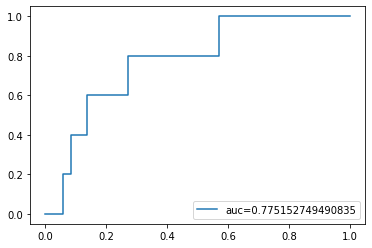

In [ ]:
scores = L_results.predict(data_test[exog_var])
#or scores = results.predict(data[exog_var])
y = data_test['default_RR'].values

fpr, tpr, thresholds = sklm.roc_curve(y, scores)

auc = sklm.roc_auc_score(y, scores)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

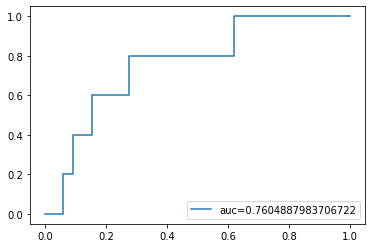

In [ ]:
scores1 = P_results.predict(data_test[exog_var])
#or scores = results.predict(data[exog_var])
y = data_test['default_RR'].values

fpr, tpr, thresholds = sklm.roc_curve(y, scores1)

auc = sklm.roc_auc_score(y, scores1)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

**7. (extra points) Use machine learning methods to select variables from the list of all variables and then run a logit regression and plot the ROC curve. Does this improve the prediction?**

In [ ]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
alphas = 10**np.linspace(2,-8,100)
lasso = Lasso(fit_intercept = True)
cv = []
for a in alphas:
    lasso.set_params(alpha=a, fit_intercept = True)
    lasso.fit(x_train,y_train)
    cv.append(cross_val_score(lasso, x_train,y_train, cv=5, scoring='neg_mean_squared_error').mean())


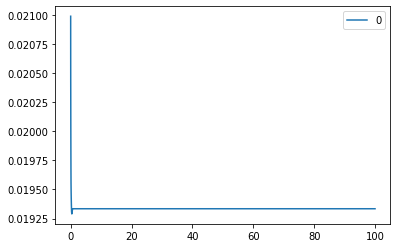

In [ ]:
(-pd.DataFrame(cv, index = alphas)).plot()

In [ ]:
#Find optimal penalty based on cross-validation
alpha_l = np.linspace(0.001, 2, num=1000)

lassocv = LassoCV(alphas=alpha_l, fit_intercept = True, cv=5)
lassocv.fit(x_train, y_train)

mean_squared_error(y_test, lassocv.predict(x_test))

0.010364155152136444

In [ ]:
lassocv.alpha_


0.3631811811811812

In [ ]:
lasso.set_params(alpha=5)
lasso.fit(x_train, y_train)
y_lasso_pred = lasso.predict(x_test)
lasso_rsquared = r2_score(y_test, lasso.predict(x_test))
lasso_mse = mean_squared_error(y_test, lasso.predict(x_test))
lasso_rmse = np.sqrt(lasso_mse)
print(lasso_rsquared, lasso_mse, lasso_rmse)

-0.036220695178942997 0.010340473004456232 0.10168811633842094


In [ ]:
pd.Series(lasso.coef_, index=x_train.columns)

Netforeignassets_currentLCU         7.333579e-17
Inflationconsumerprices_annualpc    0.000000e+00
Externalbalanceongoodsandservice    0.000000e+00
Currentaccountbalance_BoPcurrent   -5.746249e-14
Nettradeingoodsandservices_BoPcu    8.435000e-14
Unemploymenttotal_pctoftotallabo    0.000000e+00
DGDP                               -0.000000e+00
RYPC                               -0.000000e+00
CGEB                                0.000000e+00
PSBR                               -0.000000e+00
BINT                                0.000000e+00
PUDP                                0.000000e+00
SODD                               -0.000000e+00
CARA                                0.000000e+00
IRTD                               -0.000000e+00
TDPX                                0.000000e+00
TDPY                                0.000000e+00
TSPY                                0.000000e+00
INPS                                0.000000e+00
INPY                                0.000000e+00
XRRE                

In [ ]:
pd.Series(lasso.coef_, index=x_test.columns)

Netforeignassets_currentLCU         7.333579e-17
Inflationconsumerprices_annualpc    0.000000e+00
Externalbalanceongoodsandservice    0.000000e+00
Currentaccountbalance_BoPcurrent   -5.746249e-14
Nettradeingoodsandservices_BoPcu    8.435000e-14
Unemploymenttotal_pctoftotallabo    0.000000e+00
DGDP                               -0.000000e+00
RYPC                               -0.000000e+00
CGEB                                0.000000e+00
PSBR                               -0.000000e+00
BINT                                0.000000e+00
PUDP                                0.000000e+00
SODD                               -0.000000e+00
CARA                                0.000000e+00
IRTD                               -0.000000e+00
TDPX                                0.000000e+00
TDPY                                0.000000e+00
TSPY                                0.000000e+00
INPS                                0.000000e+00
INPY                                0.000000e+00
XRRE                